# Stocks Analysis
The objective of this case study is to use a regression-based model and another statistical model for time series analysis to predict the value of stocks.

# Content

* [1. Introduction](#2)
* [2. Business Understanding](#3)
* [3. Data Understanding - Exploratory Data Analysis](#4)
    * [3.1 Load Libraries](#4.1)    
    * [3.2. Load Dataset](#4.2)
    * [3.3. Exploratory Data Analysis](#4.3)
    * [3.4. Descriptive Statistics](#4.4)
    * [3.5. Data Visualisation](#4.5)
* [4. Data Preparation](#5)
* [5. Modeling](#6)
    * [5.1 Train / Test Split](#6.1) 
    * [5.2.Linear Regression Model](#6.2) 
* [6.Data Preparation ARIMA Model](#7)        
    * [6.1. Stationary Time Series](#7.1)
    * [6.2. Checks for Stationarity](#7.2)
        * [6.2.1. Summary Statistics](#7.2.1)
        * [6.2.2. Augmented Dickey-Fuller test](#7.2.2)
    * [6.3. Use and Remove Trends](#7.3)
* [7. ARIMA Model](#8)
    * [7.1. Hyperparameters for ARIMA model](#8.1)
* [8. Comparision Linear Regression vs ARIMA](#9)
* [9. References](#10) 

<a id='2'></a>
# 1. Introduction 

**What are ETFs?**

ETFs are investment funds that are traded on the stock exchange, similar to company stocks. Unlike a stock that represents ownership in a specific company, an ETF reflects a basket of assets, which can include stocks, bonds, and commodities, among others.


In the ever-evolving world of finance, data analytics and machine learning have become indispensable tools for informed decision-making. In the pursuit of optimising investment strategies, this project embarks on a journey to harness the power of data to predict the profitability of Exchange-Traded Funds (ETSs).


The financial markets are complex ecosystems, where numerous factors influence the performance of assets. As a popular investment vehicle, ETFs offer exposure to diversified portfolios of assets, making them an attractive option for investors seeking a broad spectrum of market opportunities. However, the profitability of these ETFs is inherently tied to the individual stocks that constitute them.


Our exploration centres on the opening and closing prices of stocks, as well as other relevant data within our dataset. External influences, such as geopolitical or environmental factors, are intentionally excluded to focus solely on the internal dynamics of these financial assets.


This endeavour embodies the essence of data analytics leveraging the CRISP-DM methodology to systematically progress through the project phases, from understanding the business objectives to data preparation, modelling evaluation, and deployment. As we delve into this project, we recognize the critical importance of clear documentation, thorough evaluation, and continuous improvement to ensure that the results generated are not only insightful but also dependable.

All data used in this project is for public use and can be found at the following links:

* https://www.ishares.com/us/products/etf-investments#/?productView=etf&pageNumber=1&sortColumn=totalNetAssets&sortDirection=desc&dataView=keyFacts

* https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs

<font color='red'>Note : This project focuses on the analysis and evaluation of Machine Learning and Data Analytics tools to determine the optimal models in predicting the profitability of stocks.The project does not aim to provide incentives or advice on stock investments. Any investment, including ETFs, comes with risks. Before investing in an ETF, it's crucial to fully research and understand its characteristics and risks. It's highly recommended to consult with a financial advisor or investment expert when exploring investment options. </font> 

<a id='3'></a>
# 2. Business Understanding

The project involves a rigorous process of selecting and applying diverse machine-learning algorithms to historical stock market data. In the initial phase of the project, we seek a comprehensive understanding of the business objectives.

To accomplish this, the project may involve tasks such as data preprocessing, feature selection, model training, and model evaluation. The performance of various models will be compared, and the one that exhibits the highest predictive accuracy and reliability in determining stock profitability will be identified as the optimal

<a id='4'></a>
# 3. Data Understanding - Exploratory Data Analysis

Perform an initial assessment of the data to understand its structure, format, and general characteristics, verifying the data sources, data types, and the size of the dataset. Furthermore, examine summary statistics, including measures of central tendency and dispersion, to identify any unusual or extreme values where we visualize the data using charts or graphs to identify trends, patterns and potential inconsistencies

<a id='4.1'></a>
## 3.1. Load Libraries

In [1]:
# We import all the libraries that we need in our analysis and we will import others as we need them.

import pandas as pd
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

<a id='4.2'></a>
## 3.2. Load Dataset

In [2]:
# Importing the dataset.

df_ETF = pd.read_excel('iShares_UnitedStates_Modified.xls')

<a id='4.3'></a>
## 3.3. Exploratory Data Analysis

In [3]:
df_ETF.head()

,Ticker,Name,SEDOL,ISIN,CUSIP,Incept. Date,Gross Expense Ratio (%),Net Expense Ratio (%),Net Assets (USD),Net Assets as of,...,Fixed Income Characteristics - Option Adjusted Spread,Fixed Income Characteristics - Avg. Yield (%),Fixed Income Characteristics - Avg. Yield as of Date,Sustainability Characteristics (MSCI ESG Fund Ratings) - MSCI ESG Fund Rating (AAA-CCC),Sustainability Characteristics (MSCI ESG Fund Ratings) - MSCI ESG Quality Score (0-10),Sustainability Characteristics (MSCI ESG Fund Ratings) - MSCI Weighted Average Carbon Intensity (Tons CO2E/$M SALES),Sustainability Characteristics (MSCI ESG Fund Ratings) - MSCI ESG % Coverage,Sustainability Characteristics (MSCI ESG Fund Ratings) - Sustainable Classification,Sustainability Characteristics (MSCI ESG Fund Ratings) - As of,Sustainability Characteristics (MSCI ESG Fund Ratings) - Based on holdings as of
0,IVV,iShares Core S&P 500 ETF,-,US4642872000,464287200,2000-05-15,0.03,0.03,3.421875e+11,2023-10-20,...,0.00682,-,-,A,6.6003,113.33,98.88,-,2023-09-21 00:00:00,2023-08-31 00:00:00
1,IEFA,iShares Core MSCI EAFE ETF,-,US46432F8427,46432F842,2012-10-18,0.07,0.07,9.263588e+10,2023-10-20,...,0.00013,-,-,AA,7.5536,106.96,99.7,-,2023-09-21 00:00:00,2023-08-31 00:00:00
2,AGG,iShares Core U.S. Aggregate Bond ETF,-,US4642872265,464287226,2003-09-22,0.03,0.03,8.885685e+10,2023-10-20,...,56.15833,5.74,2023-10-19 00:00:00,A,6.0752,271.14,66.92,-,2023-09-21 00:00:00,2023-08-31 00:00:00
3,IWF,iShares Russell 1000 Growth ETF,-,US4642876142,464287614,2000-05-22,0.19,0.19,6.885560e+10,2023-10-20,...,0.00214,-,-,A,6.6448,30.75,99.45,-,2023-09-21 00:00:00,2023-08-31 00:00:00
4,IEMG,iShares Core MSCI Emerging Markets ETF,-,US46434G1031,46434G103,2012-10-18,0.09,0.09,6.719045e+10,2023-10-20,...,0.00226,-,-,BBB,5.3425,337.9,95.65,-,2023-09-21 00:00:00,2023-08-31 00:00:00


In [4]:
# Columns of interest
columns_selected = [
    "Ticker", 
    "Name", 
    "Gross Expense Ratio (%)", 
    "Avg. Annual Return: Price Monthly - 1Y (%)",
    "Avg. Annual Return: Price Monthly - 3Y (%)",
    "Avg. Annual Return: Price Monthly - 5Y (%)",
    "Avg. Annual Return: Price Monthly - 10Y (%)"
]

# New DataFrame
df_selected = df_ETF[columns_selected]
df_selected.head(-5)

,Ticker,Name,Gross Expense Ratio (%),Avg. Annual Return: Price Monthly - 1Y (%),Avg. Annual Return: Price Monthly - 3Y (%),Avg. Annual Return: Price Monthly - 5Y (%),Avg. Annual Return: Price Monthly - 10Y (%)
0,IVV,iShares Core S&P 500 ETF,0.03,21.691873,10.174129,9.896895,11.873788
1,IEFA,iShares Core MSCI EAFE ETF,0.07,25.2,5.23,3.05,4
2,AGG,iShares Core U.S. Aggregate Bond ETF,0.03,0.54,-5.21,0.08,1.09
3,IWF,iShares Russell 1000 Growth ETF,0.19,27.457088,7.796373,12.204825,14.26745
4,IEMG,iShares Core MSCI Emerging Markets ETF,0.09,13.37,-0.89,1.06,2.29
...,...,...,...,...,...,...,...
421,ITDC,iShares® LifePath® Target Date 2035 ETF,0.10,-,-,-,-
422,ITDD,iShares® LifePath® Target Date 2040 ETF,0.11,-,-,-,-
423,IBIJ,iShares® iBonds® Oct 2033 Term TIPS ETF,0.10,-,-,-,-
424,ITDE,iShares® LifePath® Target Date 2045 ETF,0.11,-,-,-,-


In [5]:
# Convert column to floating point numbers
df_selected["Avg. Annual Return: Price Monthly - 10Y (%)"] = pd.to_numeric(df_selected["Avg. Annual Return: Price Monthly - 10Y (%)"], errors='coerce')

# Top 10 ETFs Avg. Annual Return 10 years
top_10_10_years = df_selected.sort_values(by="Avg. Annual Return: Price Monthly - 10Y (%)", ascending=False).head(10)
top_10_10_years[['Ticker', 'Name', 'Avg. Annual Return: Price Monthly - 10Y (%)']]


,Ticker,Name,Avg. Annual Return: Price Monthly - 10Y (%)
62,SOXX,iShares Semiconductor ETF,23.140869
44,IYW,iShares U.S. Technology ETF,19.191494
101,IXN,iShares Global Tech ETF,17.690000
105,IGM,iShares Expanded Tech Sector ETF,17.664976
80,IGV,iShares Expanded Tech-Software Sector ETF,16.448680
67,IWY,iShares Russell Top 200 Growth ETF,15.570100
222,SMIN,iShares MSCI India Small-Cap ETF,14.980000
3,IWF,iShares Russell 1000 Growth ETF,14.267450
137,ITB,iShares U.S. Home Construction ETF,13.972729
83,IHI,iShares U.S. Medical Devices ETF,13.712762


The table above shows that SOXX is the most profitable ETF, with a return of 23.14% over 10 years.

According to the previous exploration, we are going to load the database of the companies that make up the SOXX ETF to carry out a brief exploration and subsequently analyze the stocks.

In [6]:
# Importing the dataset.

df_SOXX = pd.read_csv('SOXX_holdings_Modified.csv')

In [7]:
df_SOXX.head()

,Ticker,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Shares,Price,Location,Exchange,Currency,FX Rate,Market Currency,Accrual Date
0,AMD,ADVANCED MICRO DEVICES INC,Information Technology,Equity,"712,720,222.11",8.47,"712,720,222.11","7,010,133.00",101.67,United States,NASDAQ,USD,1,USD,-
1,AVGO,BROADCOM INC,Information Technology,Equity,"707,559,525.52",8.41,"707,559,525.52","803,032.00",881.11,United States,NASDAQ,USD,1,USD,-
2,NVDA,NVIDIA CORP,Information Technology,Equity,"655,640,551.59",7.79,"655,640,551.59","1,501,593.00",436.63,United States,NASDAQ,USD,1,USD,-
3,INTC,INTEL CORPORATION CORP,Information Technology,Equity,"567,706,991.40",6.75,"567,706,991.40","16,412,460.00",34.59,United States,NASDAQ,USD,1,USD,-
4,TXN,TEXAS INSTRUMENT INC,Information Technology,Equity,"504,187,420.88",5.99,"504,187,420.88","3,431,714.00",146.92,United States,NASDAQ,USD,1,USD,-


In [8]:
# Ordenando el DataFrame basado en la columna "Weight (%)" de mayor a menor
df_sorted = df_SOXX[['Ticker', 'Name', 'Weight (%)']].sort_values(by='Weight (%)', ascending=False)

# Mostrando las primeras filas del DataFrame ordenado
df_sorted.head()

,Ticker,Name,Weight (%)
0,AMD,ADVANCED MICRO DEVICES INC,8.47
1,AVGO,BROADCOM INC,8.41
2,NVDA,NVIDIA CORP,7.79
3,INTC,INTEL CORPORATION CORP,6.75
4,TXN,TEXAS INSTRUMENT INC,5.99


According to the previous table, the company that has the greatest weight within the SOXX portfolio is the company ADVANCED MICRO DEVICES INC (AMD) with 8.47%.

Therefore, we will analyze the company AMD to observe the behaviour of its stocks from 2007 to 2017.

In [9]:
# Load Dataset AMD Stocks 2007 - 2017
amd_data = pd.read_csv('df_AMD_stocks.csv')

amd_data.head(-5)

,Date,Open,High,Low,Close,Volume
0,2007-01-03,20.080,20.40,19.35,19.520,28107900
1,2007-01-04,19.660,19.86,19.32,19.790,23380300
2,2007-01-05,19.540,19.91,19.54,19.710,15772600
3,2007-01-08,19.710,19.86,19.25,19.470,15814600
4,2007-01-09,19.450,19.71,19.37,19.650,14098100
...,...,...,...,...,...,...
2726,2017-10-30,11.255,11.42,10.65,10.890,137785101
2727,2017-10-31,10.760,11.31,10.69,10.985,78600023
2728,2017-11-01,11.250,11.29,10.72,10.800,66875483
2729,2017-11-02,10.870,10.99,10.66,10.850,47942464


In [10]:
# shape
amd_data.shape

(2736, 6)

In [11]:
amd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2736 non-null   object 
 1   Open    2736 non-null   float64
 2   High    2736 non-null   float64
 3   Low     2736 non-null   float64
 4   Close   2736 non-null   float64
 5   Volume  2736 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 128.4+ KB


<a id='4.4'></a>
## 3.4. Descriptive Statistics

In [12]:
# describe
amd_data.describe()

,Open,High,Low,Close,Volume
count,2736.000000,2736.000000,2736.000000,2736.000000,2.736000e+03
mean,6.369121,6.495357,6.228239,6.358043,2.697713e+07
std,3.812812,3.866296,3.746071,3.803936,2.245580e+07
min,1.620000,1.690000,1.610000,1.620000,0.000000e+00
25%,3.430000,3.500000,3.337500,3.420000,1.431327e+07
50%,5.550000,5.700000,5.400000,5.540000,2.098237e+07
75%,8.222500,8.332500,8.062500,8.202500,3.138602e+07
max,20.080000,20.630000,19.800000,20.180000,2.677054e+08


This analysis is based on closing prices.

Count: There are 2736 observations in our data.

Mean: The average closing price of the shares is approximately 6.36 USD. This means that, on average, AMD shares closed around this price during the period from 2007 to 2017.

Std: The standard deviation is approximately 3.80 USD. This is a measure of the dispersion of closing prices around the mean. A higher standard deviation indicates greater volatility in the share closing price.

Min: The lowest recorded closing price is 1.62 USD, which would be the lowest value at which the shares closed on any day during 2007 to 2017.

25%: The first quartile is 3.42 USD, which means that 25% of the closing prices are less than or equal to this value. This also indicates that 75% of the closing prices are above this value.

50%: The median is 5.54 USD, which is the middle value of the data. The median is less sensitive to outliers and is often considered a better measure of central tendency when the distribution is not symmetrical.

75%: The third quartile is 8.20 USD, which means that 75% of the closing prices are less than or equal to this value and 25% are higher.

Max: The highest closing price is 20.18 USD, which would be the highest value at which the shares closed on any day during the data set period.

The maximum volume value is notably high compared to the average, which may indicate trading days with unusually high activity, possibly due to specific events that affected the company or the market in general.

<a id='4.5'></a>
## 3.5. Data Visualisation

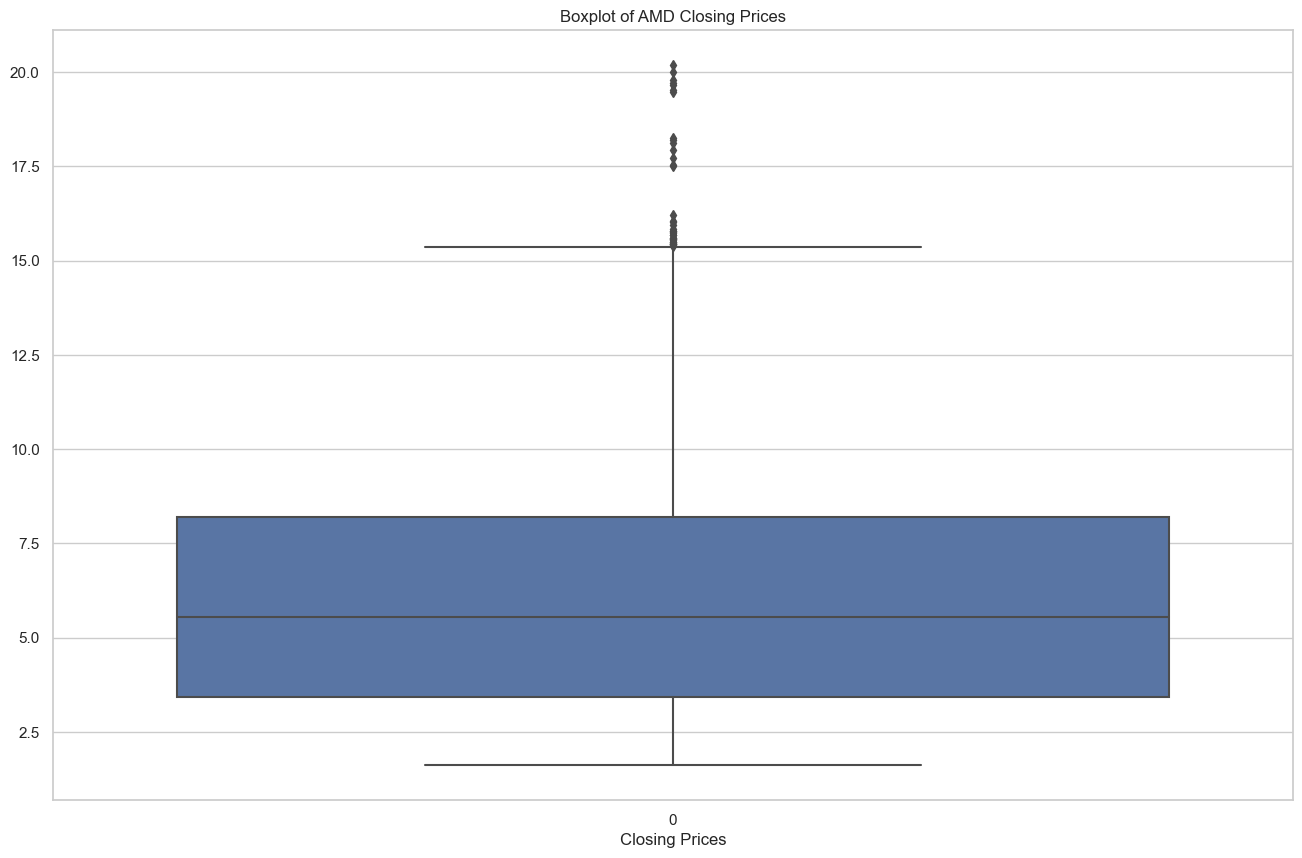

In [13]:
# Box plot

sns.set(style="whitegrid")

plt.figure(figsize=(16, 10))
sns.boxplot(amd_data['Close'])

plt.title('Boxplot of AMD Closing Prices')
plt.xlabel('Closing Prices')

plt.show()

As we can see, the data does not have a normal distribution, but this behavior is normal according to the behavior of the shares in the market.
Here are some reasons why this is common:

Volatility: In financial markets, volatility tends to cluster; there are periods of high volatility followed by periods of low volatility. This can cause the distribution of returns (or price changes) to deviate from normality.

Bias: Stock prices often show bias, either positive (where there is a possibility of large gains) or negative (where there is a possibility of large losses, as during a financial crisis).

Heavy Tails: The distribution of stock prices usually has heavier tails than a normal distribution. This means that there is a greater probability of observing extreme events (large price changes) than the normal distribution would predict.

Psychological Floors and Ceilings: Traders and investors often act at price levels that are round or significant, which can cause the price distribution to be non-normal.

Market Interventions: Government policies, company announcements, and other events can cause price movements that are not normally distributed.

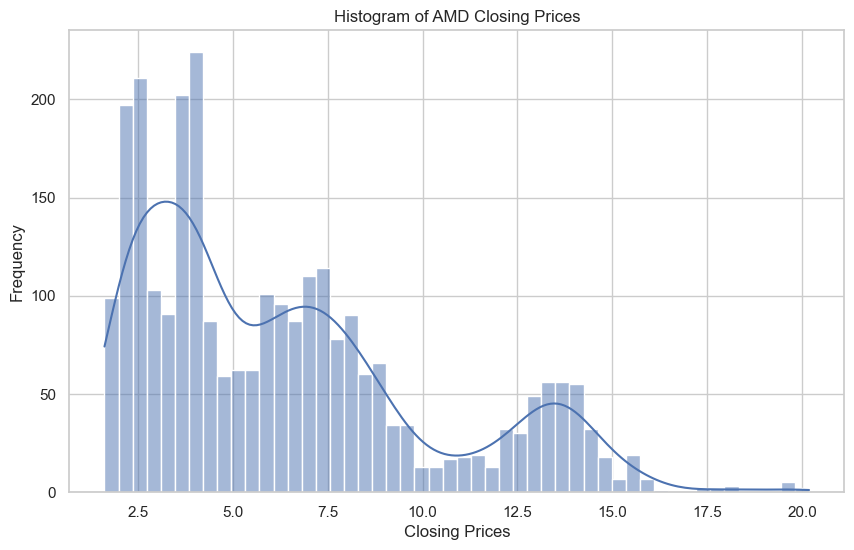

In [14]:
# Histogram AMD Stocks
plt.figure(figsize=(10, 6))
sns.histplot(amd_data['Close'], bins=50, kde=True)

plt.title('Histogram of AMD Closing Prices')
plt.xlabel('Closing Prices')
plt.ylabel('Frequency')

plt.show()

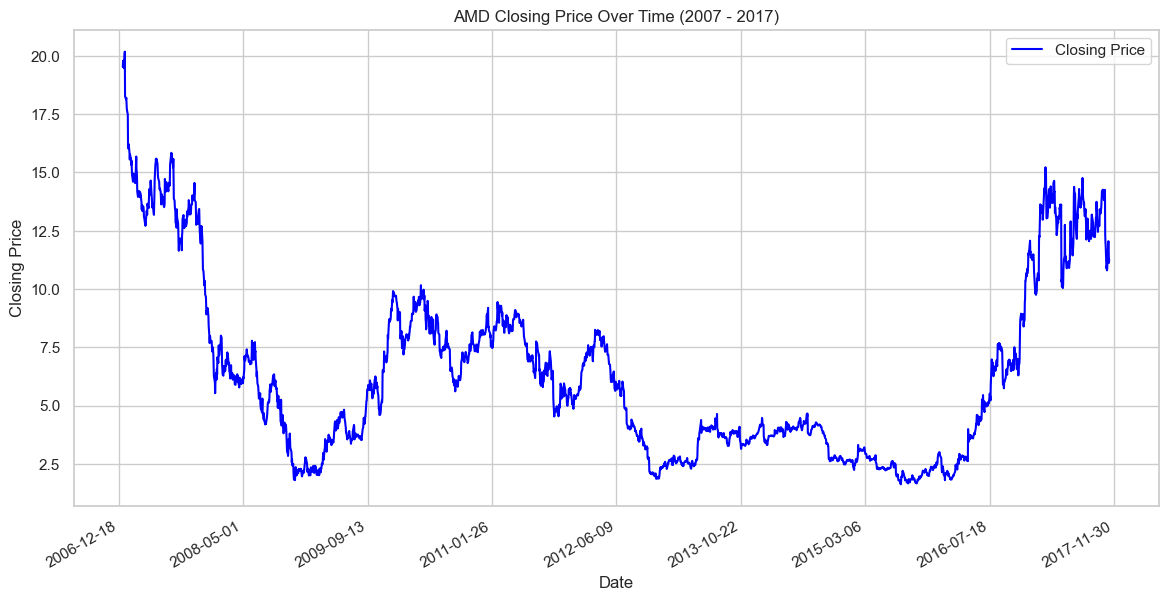

In [15]:
# AMD Closing Price Over Time 2007 - 2017
amd_data['Date'] = pd.to_datetime(amd_data['Date'])

plt.figure(figsize=(14, 7))
plt.plot(amd_data['Date'], amd_data['Close'], label='Closing Price', color='blue')

plt.title('AMD Closing Price Over Time (2007 - 2017)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

plt.gcf().autofmt_xdate() 
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10)) 

plt.show()

<a id='5'></a>
# 4. Data Preparation

In [16]:
null_counts_stocks = amd_data.isnull().sum()
null_counts_stocks

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

<a id='6'></a>
# 5. Modeling

<a id='6.1'></a>
## 5.1. Train / Test Split

In [17]:
# Split the dataset into X and y columns
X = amd_data[['Open', 'High', 'Low']] # Independent variable 
y = amd_data['Close'] # Dependent variable

X, y

(       Open   High     Low
 0     20.08  20.40  19.350
 1     19.66  19.86  19.320
 2     19.54  19.91  19.540
 3     19.71  19.86  19.250
 4     19.45  19.71  19.370
 ...     ...    ...     ...
 2731  12.04  12.09  11.640
 2732  11.94  12.27  11.940
 2733  11.94  11.95  11.510
 2734  11.25  11.35  11.030
 2735  11.22  11.43  11.115
 
 [2736 rows x 3 columns],
 0       19.52
 1       19.79
 2       19.71
 3       19.47
 4       19.65
         ...  
 2731    11.93
 2732    12.05
 2733    11.71
 2734    11.12
 2735    11.26
 Name: Close, Length: 2736, dtype: float64)

<a id='6.2'></a>
## 5.2. Linear Regression Model

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

# 80 Train - Test 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2736, 3), (2736,), (2188, 3), (548, 3), (2188,), (548,))

In [19]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Cross Validation Score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv = 10,
                             scoring='r2')
    
    print('Mean R^2 in Cross Validation CV Mean: ', np.mean(scores))
    print('Standard Deviation of R^2 in Cross Validation STD: ', np.std(scores))
    print('\n')

In [21]:
# Trainning Linear Regression Model
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

y_pred = linear_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
get_cv_scores(linear_model)

print('R^2:', r2)
print('Mean Square Error MSE:', mse)

Mean R^2 in Cross Validation CV Mean:  0.9995438469439193
Standard Deviation of R^2 in Cross Validation STD:  8.961890295613248e-05


R^2: 0.9996045735222688
Mean Square Error MSE: 0.005830863445223289


The results we obtained indicate that the linear regression model performs excellently on our data. Cross-validation yields an R2 of 0.9995 with a very low standard deviation (approximately 0.00009), suggesting that the model is very stable and generalizes well across different subsets of the training set.

The R2 value on the test set is also exceptionally high (0.9996), which means that the model explains almost all the variability of the data around the mean.

The Mean Squared Error (MSE) on the test set is 0.0058, which is consistently low, reflecting a good fit of the model to the data.

These results are too good, and we should be suspicious of this, as we might have an independence issue. Since we are using "Open", "High", and "Low" to predict "Close", we must ensure that these variables are independent of each other for linear regression to be an appropriate model. In stock market data, these variables may be highly correlated, which could be a reason for such high R2 values.

As we can see in the Correlation Matrix, the correlations between the variables are almost 1, which indicates that the variables are highly correlated, so these variables are not independent of each other.

In [22]:
# Correlation Matrix between 'Open', 'High', 'Low', and 'Close'.
correlation_matrix = amd_data[['Open', 'High', 'Low', 'Close']].corr()
correlation_matrix

,Open,High,Low,Close
Open,1.000000,0.999374,0.999285,0.998682
High,0.999374,1.000000,0.999109,0.999410
Low,0.999285,0.999109,1.000000,0.999419
Close,0.998682,0.999410,0.999419,1.000000


<a id='7'></a>
# 6. Data Preparation ARIMA Model

<a id='7.1'></a>
##  6.1. Stationary Time Series

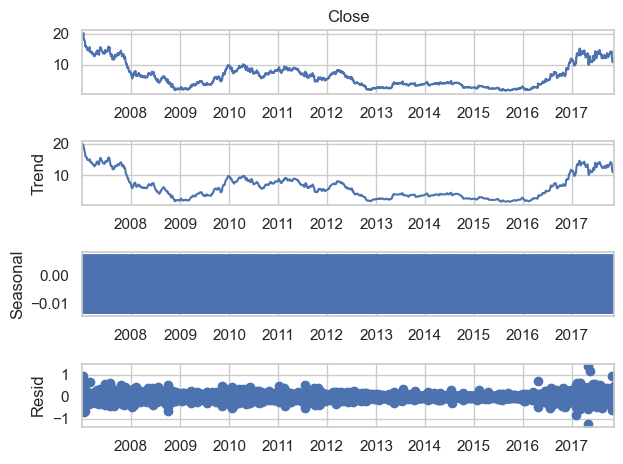

In [23]:
# Automatic Time Series Decomposition
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

# Load the DataFrame
df_AMD_stocks = pd.read_csv('df_AMD_stocks.csv')

# Convert 'Date' column to date format and set it as index
df_AMD_stocks['Date'] = pd.to_datetime(df_AMD_stocks['Date'])
df_AMD_stocks.set_index('Date', inplace=True)

# Sort the DataFrame by date index
df_AMD_stocks.sort_index(inplace=True)

# Frequency of the observations freg = 'B' business days
df_AMD_stocks = df_AMD_stocks.asfreq('B')

# interpolate() means replacement of values if some data is missed
df_AMD_stocks.interpolate(method='time', inplace=True)

# decompose the data using seasonal_decompose() function in the column 'Close'
result = seasonal_decompose(df_AMD_stocks['Close'], model='additive')

result.plot()
pyplot.show()

<a id='7.2'></a>
## 6.2 Checks for Stationarity

<a id='7.2.1'></a>
### 6.2.1. Summary Statistics

A quick and dirty check to see if our time series is not stationary is to check the summary statistics. Let's divide the time series into two (or more) partitions and compare the mean and variance of each group. If they differ and the difference is statistically significant, the time series is likely not stationary.

Ref: Chapter 15 - Copyright Introduction to Time Series Forecasting with Python © Copyright 2020 Jason Brownlee. All Rights Reserved.

In [24]:
# Calculate the mean value of first 125 rows and afterwards
mean1, mean2 = df_AMD_stocks.iloc[:125].Close.mean(), df_AMD_stocks.iloc[125:].Close.mean()

# Calculate the variance value of first 125 rows and afterwards
var1, var2 = df_AMD_stocks.iloc[:125].Close.var(), df_AMD_stocks.iloc[125:].Close.var()

# Display mean and variance of two parts of the time series
print('mean1 = %f, mean2 = %f' % (mean1, mean2))
print('variance1 = %f, variance2 = %f' % (var1, var2))

mean1 = 14.836640, mean2 = 5.958881
variance1 = 2.873237, variance2 = 11.511095


As we can observe, the means and variances of each group are different, which suggests that our time series is stationary. However, to determine if a difference is statistically significant, a statistical test that provides a p-value is commonly used. The p-value indicates the probability of observing a result as extreme as the one observed, under the null hypothesis (the hypothesis that there is no effect or difference).

Common criteria for statistical significance:

p-value < 0.05: It is considered statistically significant.

p-value < 0.01: It is considered very statistically significant.

p-value < 0.001: It is considered extremely statistically significant.

Having said the above, we will now calculate the p-value for our time series through the ADF test.

<a id='7.2.2'></a>
### 6.2.2. Augmented Dickey-Fuller test

The ADF test is a unit root test used to determine if a time series is stationary. The null hypothesis (H0) of the ADF test is that the time series has a unit root, which implies that it is not stationary. It has a stochastic trend. On the other hand, the alternative hypothesis (H1) is that the time series does not have a unit root, which implies that it is stationary.

Ref: Chapter 15 - Copyright Introduction to Time Series Forecasting with Python © Copyright 2020 Jason Brownlee. All Rights Reserved.

In [25]:
# Augmented Dickey-Fuller (stationarity test of time series data)
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller

df = read_csv('df_AMD_stocks.csv', header=0, index_col=0, parse_dates=True)
X = df['Close'].dropna()
result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.902856
p-value: 0.045017
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


According to the results:

ADF Statistic: -2.902856

This value is compared to the critical values. If the ADF statistic is lower than the critical value, we can reject the null hypothesis with a 5% confidence level, suggesting that the time series is stationary.

p-value: 0.045017

This value tells us the probability that the time series has a unit root. A low p-value (less than 0.05) means that we can reject the null hypothesis and assume that the time series is stationary, which is considered statistically significant.

Critical Values:

1%: -3.433

5%: -2.863

10%: -2.567

These are the critical values for confidence levels of 1%, 5%, and 10%, respectively. If the ADF statistic is lower than these values, we can reject the null hypothesis with that level of confidence.

<a id='7.3'></a>
## 6.3. Use and Remove Trends

Our time series data set may contain a trend. A trend is a continuous increase or decrease in the series over time.
Trends can make a time series non-stationary by introducing a systematic change in the mean of the series over time.
Removing trends makes it easier to model remaining patterns in the data, which can result in more accurate predictions.

In the graph, we can identify that there is no strong trend in the data since the line is relatively flat. But that trend was eliminated anyway through Detrend by Differencing.

Perhaps the simplest method to detrend a time series is by differencing. Specifically, a new series is constructed where the value at the current time step is calculated as the difference between the original observation and the observation at the previous time step.

value(t) = observation(t) − observation(t − 1)

This has the effect of removing a trend from a time series dataset.

Ref: Chapter 13 - Copyright Introduction to Time Series Forecasting with Python © Copyright 2020 Jason Brownlee. All Rights Reserved.

This step that we have just performed is step I of the ARIMA model which I (Integrated): The use of differentiation of raw observations (i.e., subtracting an observation from an observation in the previous time step) to make the time series stationary.

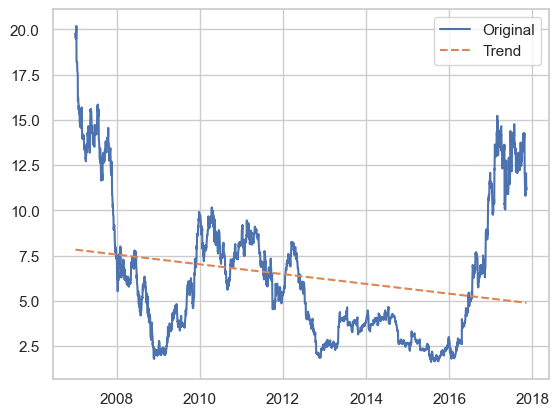

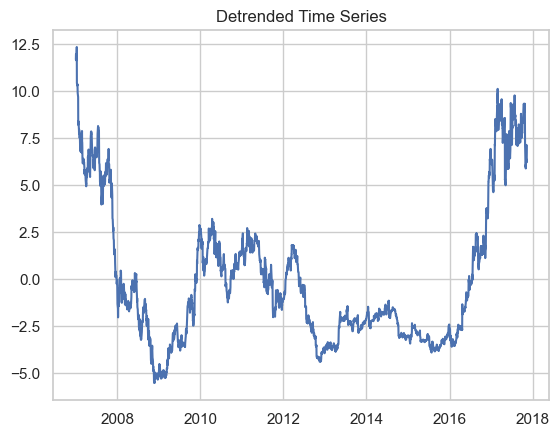

In [26]:
# use a linear model to detrend a time series
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import numpy as np

df_AMD_stocks = pd.read_csv('df_AMD_stocks.csv', index_col=0, parse_dates=True)

# Ensure that the DataFrame is sorted by date
df_AMD_stocks.sort_index(inplace=True)

# fit linear model
X = np.array(range(len(df_AMD_stocks))).reshape(-1, 1)
y = df_AMD_stocks['Close'].values
model = LinearRegression()
model.fit(X, y)

# calculate trend
trend = model.predict(X)

# plot trend
pyplot.plot(df_AMD_stocks.index, y, label='Original')
pyplot.plot(df_AMD_stocks.index, trend, label='Trend', linestyle='--')
pyplot.legend()
pyplot.show()

# Detrend
detrended = y - trend

# plot detrend
pyplot.plot(df_AMD_stocks.index, detrended)
pyplot.title('Detrended Time Series')
pyplot.show()


<a id='8'></a>
## 7. ARIMA Model

In [27]:
# import the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa
import warnings
warnings.filterwarnings("ignore")

In [28]:
# plotds is method to plot time series, ACF and PACF
def plotds(xt, nlag = 30, fig_size = (12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan = 2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax = ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags = 50, ax = ax_acf)
    plot_pacf(xt, lags = 50, ax = ax_pacf)
    plt.tight_layout()
    return None

In [29]:
# Display first 10 records
df_AMD_stocks.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-03,20.08,20.40,19.35,19.52,28107900
2007-01-04,19.66,19.86,19.32,19.79,23380300
2007-01-05,19.54,19.91,19.54,19.71,15772600
2007-01-08,19.71,19.86,19.25,19.47,15814600
2007-01-09,19.45,19.71,19.37,19.65,14098100
2007-01-10,19.64,20.02,19.50,20.01,19779800
2007-01-11,19.80,20.63,19.80,20.18,22469800
2007-01-12,18.63,18.77,17.62,18.26,122841504
2007-01-16,18.15,18.35,17.95,18.13,36731100


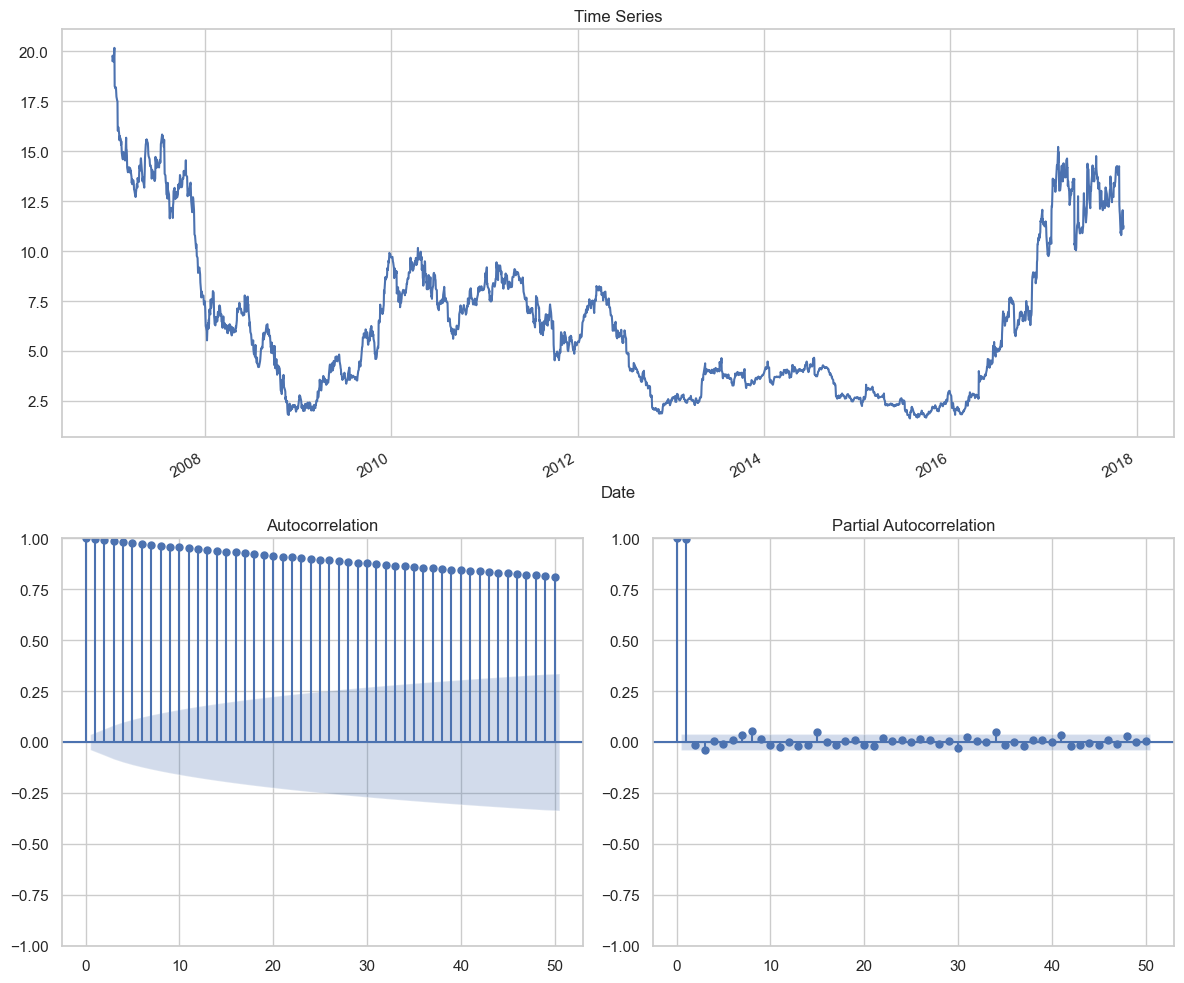

In [30]:
# Display plot of close column and Date index
plotds(df_AMD_stocks['Close'], nlag = 50)

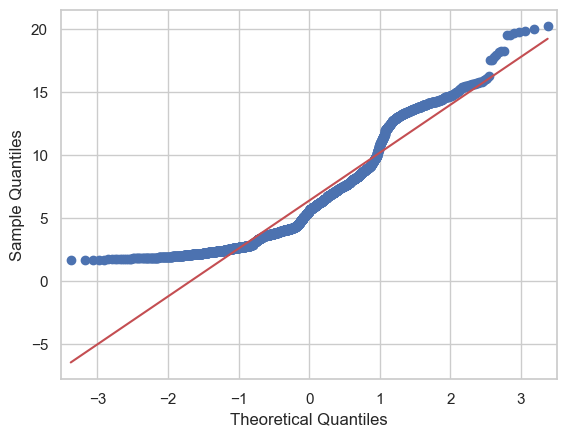

In [31]:
# qqplot for the 'Close' column
x = sm.qqplot(df_AMD_stocks['Close'], line = 's')

In [32]:
from statsmodels.tsa.arima.model import ARIMA

# Call ARIMA function to train the model on the 'Close' price
model = ARIMA(df_AMD_stocks['Close'], order = (1, 1, 0))# p, d, q

# Train ARIMA Model on the 'Close' price dataset
results_AR = model.fit()

In [33]:
# Store one difference value of the 'Close' column / In here we change the data for stationary
first_order_diff = df_AMD_stocks['Close'].diff(1)

# Display the first five records
df_AMD_stocks['Close'].head(), first_order_diff.head()

(Date
 2007-01-03    19.52
 2007-01-04    19.79
 2007-01-05    19.71
 2007-01-08    19.47
 2007-01-09    19.65
 Name: Close, dtype: float64,
 Date
 2007-01-03     NaN
 2007-01-04    0.27
 2007-01-05   -0.08
 2007-01-08   -0.24
 2007-01-09    0.18
 Name: Close, dtype: float64)

In [34]:
# Drop the first row of 'Close' column because It has 'NaN' value
first_order_diff = df_AMD_stocks['Close'].diff(1).dropna()

# Display the first five records
first_order_diff.head()

Date
2007-01-04    0.27
2007-01-05   -0.08
2007-01-08   -0.24
2007-01-09    0.18
2007-01-10    0.36
Name: Close, dtype: float64

Text(0.5, 1.0, 'First-order differences of AMD Stocks during January 2007 to Nov 2017')

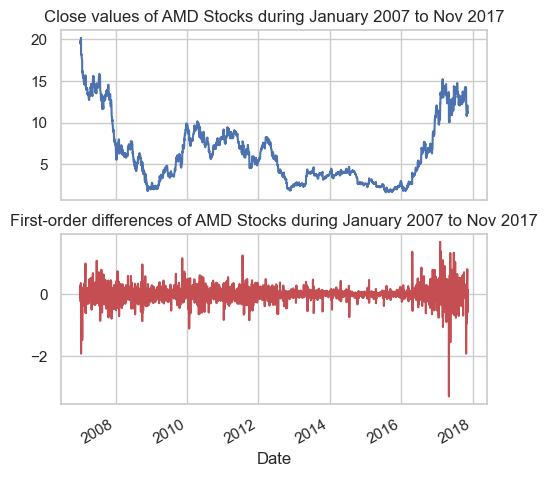

In [35]:
# Declare the fig abd ax as two arguments 
fig, ax = plt.subplots(2, sharex = True)
fig.set_size_inches(5.5, 5.5)
df_AMD_stocks['Close'].plot(ax = ax[0], color = 'b')
ax[0].set_title('Close values of AMD Stocks during January 2007 to Nov 2017')
first_order_diff.plot(ax = ax[1], color = 'r')
ax[1].set_title('First-order differences of AMD Stocks during January 2007 to Nov 2017')

ADF Statistic: -16.431272
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


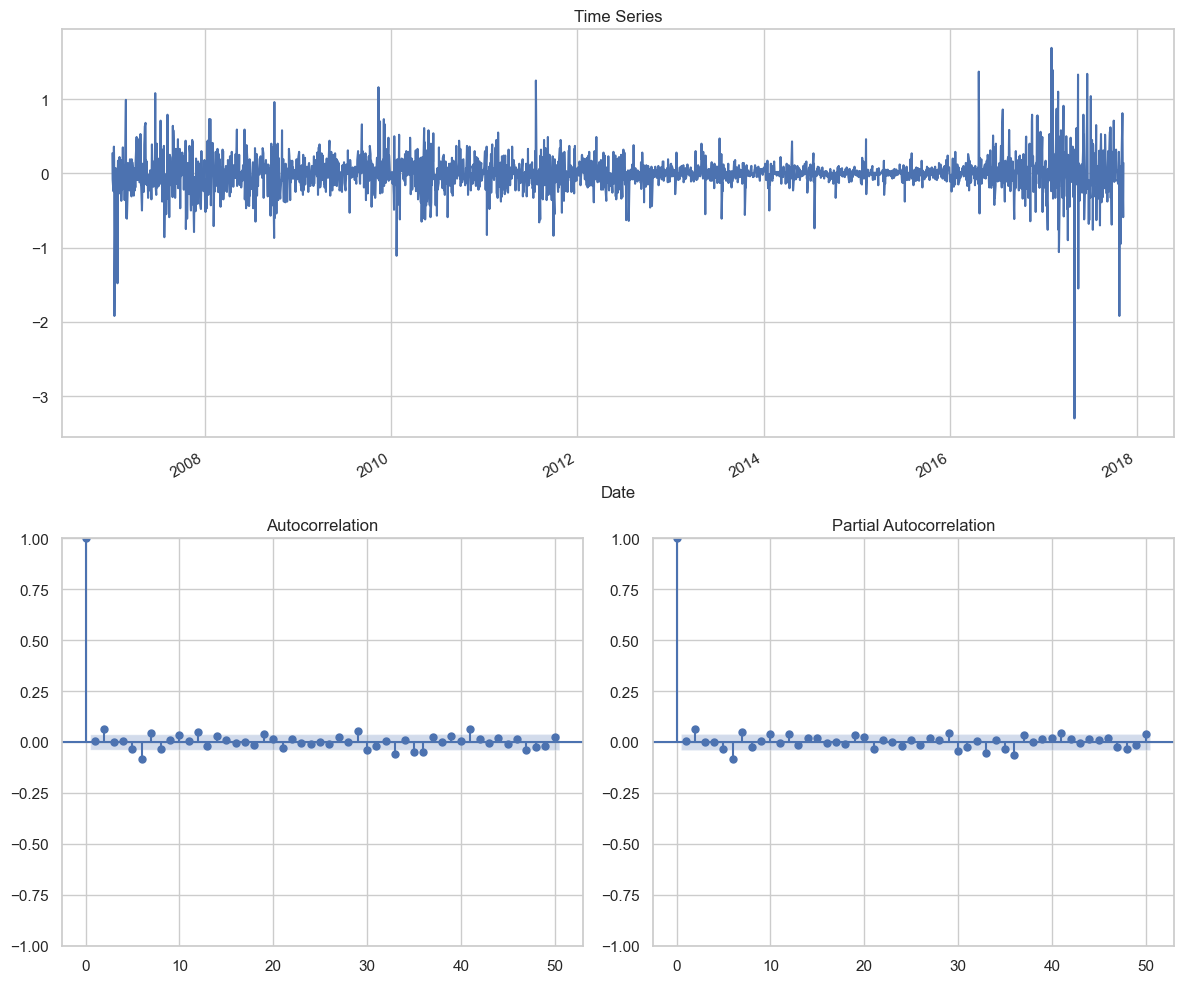

In [36]:
# calculate stationarity test of time series data through differentiation

# plot the data with 50 lags
plotds(first_order_diff, nlag = 50)

# Perform Dicky Fuller test
adf_result = adfuller(first_order_diff)

# Display the outcomes
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -16.431272 is much lower than the critical values; we reject the null hypothesis, suggesting that the time series is stationary.

p-value: 0.000000 strengthens the evidence against the null hypothesis, indicating that the series is stationary.

Critical Values: The critical values for confidence levels of 1%, 5%, and 10% are -3.433, -2.863, and -2.567, respectively. Since the ADF statistic is lower than these three values, we can say with a 1% confidence level that the time series is stationary.

The results strongly suggest that, after differentiation, the time series is definitely stationary.

Additionally, with the Augmented Dickey-Fuller test through differentiation, we eliminate the white noise that we previously had in the Autocorrelation since now all the values are close to 0.

<a id='8.1'></a>
### 7.1. Hyperparameters for ARIMA model

This approach helps us identify which set of hyperparameters might be the best for our ARIMA model based on the AIC criterion. Models with a lower AIC are preferable because they indicate a better balance between goodness of fit and the simplicity (or complexity) of the model, which helps prevent overfitting and select a model that generalizes well to new data.

In this case, our AIC would be (2, 1, 0) with an AIC of 6.526.

* p = 2 , Number of autoregressive (AR) terms in the model
* d = 1 , Number of times that the raw observations are differenced, also called the degree of differencing.
* q = 0 , Number of moving average (MA) terms in the model

In [37]:
# A nested loop is written to calculate the AIC values
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(df_AMD_stocks['Close'].tolist(), order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aicVal)

[[0, 1, 0, 13.89076814274155], [0, 1, 1, 15.868960414955325], [0, 1, 2, 6.732651364535442], [1, 1, 0, 15.866153944716928], [1, 1, 1, 15.859207202263093], [1, 1, 2, 8.621309688696869], [2, 1, 0, 6.525753942304391], [2, 1, 1, 8.525569045329291], [2, 1, 2, 10.521742778897249], [0, 2, 0, 1900.9486863213997], [0, 2, 1, 21.210870375981017], [0, 2, 2, 23.201994971226895], [1, 2, 0, 998.4619915745252], [1, 2, 1, 23.201986339767075], [1, 2, 2, 23.252495991138517], [2, 2, 0, 734.1437735970092], [2, 2, 1, 14.692148253940218], [2, 2, 2, 26.903196010866367]]


In [38]:
# Declare and initialise an object 'arima_obj' by calling a method 'ARIMA()'
arima_obj = ARIMA(df_AMD_stocks['Close'].tolist(), order = (2, 1, 0))

# Train the ARIMA model by calling a method fit()
arima_obj_fit = arima_obj.fit()

# Display the summary of the trained model
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2736
Model:                 ARIMA(2, 1, 0)   Log Likelihood                  -0.263
Date:                Thu, 02 Nov 2023   AIC                              6.526
Time:                        20:38:07   BIC                             24.267
Sample:                             0   HQIC                            12.937
                               - 2736                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0029      0.013      0.216      0.829      -0.023       0.029
ar.L2          0.0644      0.016      4.033      0.000       0.033       0.096
sigma2         0.0586      0.001    116.983      0.000       0.058       0.060
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             46830.73
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.98
Prob(H) (two-sided):                  0.34   Kurtosis:                        23.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

* AIC: Akaikes Information Criterion: Estimator of the relative quality of statistical models for a given set of data. The AIC deals with the trade-off betwen the goodness of fit of the model and the simplicity of the model.
* BIC: Bayesian Information Criterion: Similar to the AIC, but with a larger penalty term for the number of parameters in the model.
* Hannan–Quinn information criterion (HQC) is a criterion for model selection. It is an alternative to Akaike information criterion (AIC) and Bayesian information criterion (BIC). It is given as. where. is the log-likelihood, k is the number of parameters, and n is the number of observations.

In [39]:
# Declare the array 'pred' and append the values 
pred = arima_obj_fit.fittedvalues

# Add a new column 'ARIMA' into dataframe
df_AMD_stocks['ARIMA'] = pred

# Residues and fitted values are added and stored into dataframe
diffval = arima_obj_fit.resid + arima_obj_fit.fittedvalues

# Add a column 'diffval' into dataframe
df_AMD_stocks['diffval'] = diffval

# Display first five records
df_AMD_stocks.head()

,Open,High,Low,Close,Volume,ARIMA,diffval
Date,,,,,,,
2007-01-03,20.08,20.40,19.35,19.52,28107900,0.000000,19.52
2007-01-04,19.66,19.86,19.32,19.79,23380300,19.520000,19.79
2007-01-05,19.54,19.91,19.54,19.71,15772600,19.790838,19.71
2007-01-08,19.71,19.86,19.25,19.47,15814600,19.727158,19.47
2007-01-09,19.45,19.71,19.37,19.65,14098100,19.464151,19.65


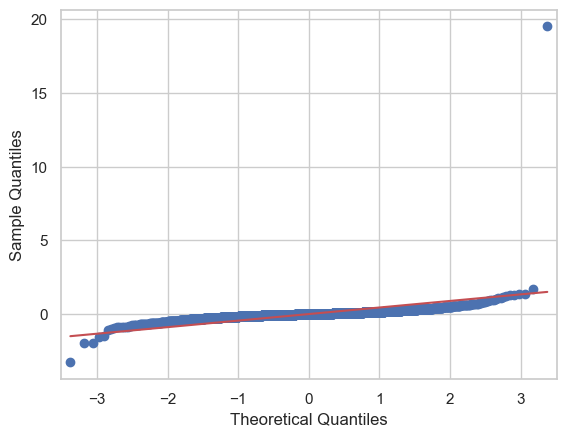

In [40]:
# Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
# Call qqplot() for arima_obj_fit
x = sm.qqplot(arima_obj_fit.resid, line = 's')

In [41]:
print(df_AMD_stocks['diffval'], df_AMD_stocks['ARIMA'])

Date
2007-01-03    19.52
2007-01-04    19.79
2007-01-05    19.71
2007-01-08    19.47
2007-01-09    19.65
              ...  
2017-11-06    11.93
2017-11-07    12.05
2017-11-08    11.71
2017-11-09    11.12
2017-11-10    11.26
Name: diffval, Length: 2736, dtype: float64 Date
2007-01-03     0.000000
2007-01-04    19.520000
2007-01-05    19.790838
2007-01-08    19.727158
2007-01-09    19.464151
                ...    
2017-11-06    11.124004
2017-11-07    11.949741
2017-11-08    12.102518
2017-11-09    11.716742
2017-11-10    11.096389
Name: ARIMA, Length: 2736, dtype: float64


Text(0, 0.5, 'Closing')

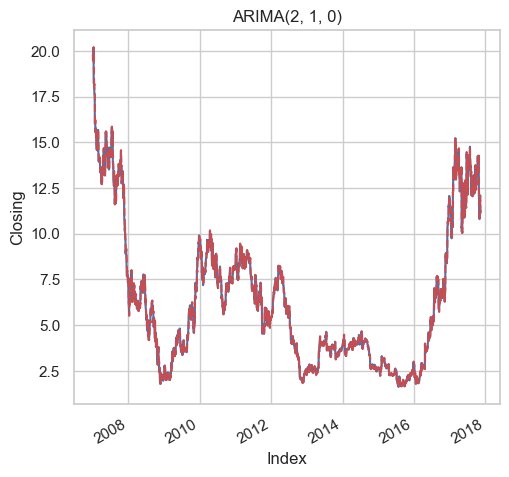

In [42]:
# Declare the objects f and array axarr
f, axarr = plt.subplots(1, sharex = True)
f.set_size_inches(5.5, 5.5)

# Ignore first one rows because of difference factor d = 1
df_AMD_stocks['diffval'].iloc[1:].plot(color = 'b', linestyle = '-', ax = axarr)
df_AMD_stocks['ARIMA'].iloc[1:].plot(color = 'r', linestyle = '--', ax = axarr)
axarr.set_title('ARIMA(2, 1, 0)')
plt.xlabel('Index')
plt.ylabel('Closing')

In [43]:
result = arima_obj_fit.get_forecast()
forecast = result.predicted_mean

# summarize confidence intervals
intervals = [0.2, 0.1, 0.05, 0.01]

for a in intervals:
    ci = result.conf_int(alpha=a)
    print('%.1f%% Confidence Interval: %.3f between %.3f and %.3f' % ((1-a)*100, forecast, ci[0,0], ci[0,1]))

80.0% Confidence Interval: 11.222 between 10.912 and 11.533
90.0% Confidence Interval: 11.222 between 10.824 and 11.620
95.0% Confidence Interval: 11.222 between 10.748 and 11.697
99.0% Confidence Interval: 11.222 between 10.599 and 11.846


<a id='9'></a>
# 8. Comparison Linear Regression vs ARIMA

<a id='10'></a>
# 9. References